# Proyek Akhir Machine Learning Terapan: Recommendation System
- **Nama:** Taufan Fajarama Putrawansyah R
- **Email:** tfpruslanali@gmail.com
- **ID Dicoding:** roastland

## Import Semua Packages/Library yang Digunakan

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics.pairwise import cosine_similarity

from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

## Data Loading and Understanding

Informasi sumber dataset dapat dilihat di tautan berikut
https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset

In [84]:
books = pd.read_csv('https://github.com/roastland/machine-learning-terapan/raw/main/projects/final-project/data/Books.csv')
books.head()

<ipython-input-84-0fd1ef9502cb>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('https://github.com/roastland/machine-learning-terapan/raw/main/projects/final-project/data/Books.csv')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [85]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Berikut informasi umum pada dataset `books`:
- Dataset buku mengidentifikasi buku berdasarkan ISBN. Informasi tambahan meliputi judul buku, pengarang, tahun publikasi, penerbit, dan URL yang mengarah ke gambar sampul buku dari Amazon Web Services. Dataset ini memiliki 271,360 entri buku dengan beberapa kolom memiliki nilai null.
- Ada 271.360 baris (records atau jumlah pengamatan) dalam dataset.

Informasi Kolom:
- `ISBN`: Nomor ISBN buku, bertipe data `object`.
- `Book-Title`: Judul buku, bertipe data `object`.
- `Book-Author`: Pengarang buku, bertipe data `object`.
- `Year-Of-Publication`: Tahun publikasi buku, bertipe data `object`.
- `Publisher`: Penerbit buku, bertipe data `object`.
- `Image-URL-S`, `Image-URL-M`, `Image-URL-L`: URL gambar sampul buku dalam tiga ukuran yang berbeda, bertipe data `object`.

In [86]:
ratings = pd.read_csv('https://github.com/roastland/machine-learning-terapan/raw/main/projects/final-project/data/Ratings.csv')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [87]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


Berikut informasi umum pada dataset `ratings`:
- Dataset rating buku berisi informasi tentang rating yang diberikan oleh pengguna pada buku tertentu. Rating dapat bersifat eksplisit, diwakili dalam skala 1-10, atau implisit, diwakili oleh nilai 0 jika tidak ada rating eksplisit yang diberikan. Dataset ini memiliki 1,149,780 entri rating buku yang mencakup kedua jenis rating, eksplisit dan implisit.
- Ada 1.149.780 baris (records atau jumlah pengamatan) dalam dataset.

Informasi Kolom:
- `User-ID`: ID pengguna yang memberikan rating, bertipe data `int64`.
- `ISBN`: Nomor ISBN buku yang diberi rating, bertipe data `object`.
- `Book-Rating`: Rating buku yang diberikan oleh pengguna, bertipe data `int64`.

In [88]:
users = pd.read_csv('https://github.com/roastland/machine-learning-terapan/raw/main/projects/final-project/data/Users.csv')
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [89]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Berikut informasi umum pada dataset `users`:
- Dataset pengguna mengandung informasi demografis dan anonim dari pengguna Book-Crossing. Beberapa pengguna mungkin memiliki informasi seperti lokasi dan usia. Dataset ini memiliki 278,858 entri pengguna, di mana beberapa pengguna mungkin memiliki informasi usia yang tidak lengkap.
- Ada 278.858 baris (records atau jumlah pengamatan) dalam dataset.

Informasi Kolom:
- `User-ID`: ID pengguna, bertipe data `int64`.
- `Location`: Lokasi pengguna, bertipe data `object`.
- `Age`: Usia pengguna, bertipe data `float64`.

## Exploratory Data Analysis

In [90]:
books.nunique()

ISBN                   271360
Book-Title             242135
Book-Author            102022
Year-Of-Publication       202
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64

In [91]:
ratings.nunique()

User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64

In [92]:
users.nunique()

User-ID     278858
Location     57339
Age            165
dtype: int64

Dari 278858 pengguna di dataset `users`, hanya ada 105283 user di dataset `ratings` yang menandakan tidak semua pengguna pernah menilai suatu buku.

In [93]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,3462017942,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/042509474X.0...,http://images.amazon.com/images/P/042509474X.0...,http://images.amazon.com/images/P/006091985X.0...
freq,1,27,632,13903,7535,2,2,2


In [94]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [95]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


## Data Preprocessing

Kolom Image akan dihapus karena tidak dibutuhkan. Lalu Kolom Year-Of-Publication akan diubah ke bentuk string karena terdapat nilai yang bukan integer. Hal ini akan dianalisis kemudian.

In [96]:
#copy dataset
df_books = books.copy()

df_books.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], inplace=True)

df_books['Year-Of-Publication'] = df_books['Year-Of-Publication'].apply(str)

df_books.sample()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
176682,0312925972,"Shadow Riders : The Southern Plains Uprising, ...",Terry C. Johnston,1991,St. Martin's Paperbacks


In [97]:
year_freq = df_books['Year-Of-Publication'].value_counts().index.tolist()

year_freq.sort(reverse=True)

print(year_freq)

['Gallimard', 'DK Publishing Inc', '2050', '2038', '2037', '2030', '2026', '2024', '2021', '2020', '2012', '2011', '2010', '2008', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991', '1990', '1989', '1988', '1987', '1986', '1985', '1984', '1983', '1982', '1981', '1980', '1979', '1978', '1977', '1976', '1975', '1974', '1973', '1972', '1971', '1970', '1969', '1968', '1967', '1966', '1965', '1964', '1963', '1962', '1961', '1960', '1959', '1958', '1957', '1956', '1955', '1954', '1953', '1952', '1951', '1950', '1949', '1948', '1947', '1946', '1945', '1944', '1943', '1942', '1941', '1940', '1939', '1938', '1937', '1936', '1935', '1934', '1933', '1932', '1931', '1930', '1929', '1928', '1927', '1926', '1925', '1924', '1923', '1922', '1921', '1920', '1919', '1917', '1914', '1911', '1910', '1909', '1908', '1906', '1904', '1902', '1901', '1900', '1897', '1806', '1378', '1376', '0']


Mengubah data yang salah pada tahun publikasi

In [98]:
df_books[df_books['Year-Of-Publication'] == 'DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [99]:
df_books.loc[df_books['ISBN'] == '078946697X', 'Book-Title'].values[0]

'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\\";Michael Teitelbaum"'

In [100]:
df_books.loc[df_books['ISBN'] == '0789466953', 'Book-Title'].values[0]

'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\\";James Buckley"'

In [101]:
df_books.loc[df_books['ISBN'] == '078946697X', 'Publisher'] = "DK Publishing Inc"
df_books.loc[df_books['ISBN'] == '078946697X', 'Year-Of-Publication'] = "2000"
df_books.loc[df_books['ISBN'] == '078946697X', 'Book-Author'] = "Michael Teitelbaum"
df_books.loc[df_books['ISBN'] == '078946697X', 'Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

df_books.loc[df_books['ISBN'] == '0789466953', 'Publisher'] = "DK Publishing Inc"
df_books.loc[df_books['ISBN'] == '0789466953', 'Year-Of-Publication'] = "2000"
df_books.loc[df_books['ISBN'] == '0789466953', 'Book-Author'] = "James Buckley"
df_books.loc[df_books['ISBN'] == '0789466953', 'Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

df_books.loc[(df_books.ISBN == '078946697X') | (df_books.ISBN == '0789466953')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc


In [102]:
df_books[df_books['Year-Of-Publication'] == 'Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [103]:
df_books.loc[df_books['ISBN'] == '2070426769', 'Book-Title'].values[0]

'Peuple du ciel, suivi de \'Les Bergers\\";Jean-Marie Gustave Le ClÃ?Â©zio"'

In [104]:
df_books.loc[df_books['ISBN'] == '2070426769', 'Publisher'] = "Gallimard"
df_books.loc[df_books['ISBN'] == '2070426769', 'Year-Of-Publication'] = "2003"
df_books.loc[df_books['ISBN'] == '2070426769', 'Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
df_books.loc[df_books['ISBN'] == '2070426769', 'Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"

df_books.loc[df_books.ISBN == '2070426769']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard


In [105]:
df_books['Year-Of-Publication'] = df_books['Year-Of-Publication'].apply(int)

print(sorted(df_books['Year-Of-Publication'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


menangani data tahun publikasi yang salah karena seharusnya kolom tahun hanya diisi int, selain itu untuk data tahun bernilai 0 atau di atas 2006, akan diubah dengan median karena bersifat invalid (dataset penelitian dilakukan tahun 2004, 2 tahun tambahan untuk antisipasi jika dataset aslinya terdapat perubahan)

In [106]:
df_books.loc[(df_books['Year-Of-Publication'] > 2006) | (df_books['Year-Of-Publication'] == 0), 'Year-Of-Publication'] = np.NAN

In [107]:
df_books.isna().sum()

ISBN                      0
Book-Title                0
Book-Author               2
Year-Of-Publication    4641
Publisher                 2
dtype: int64

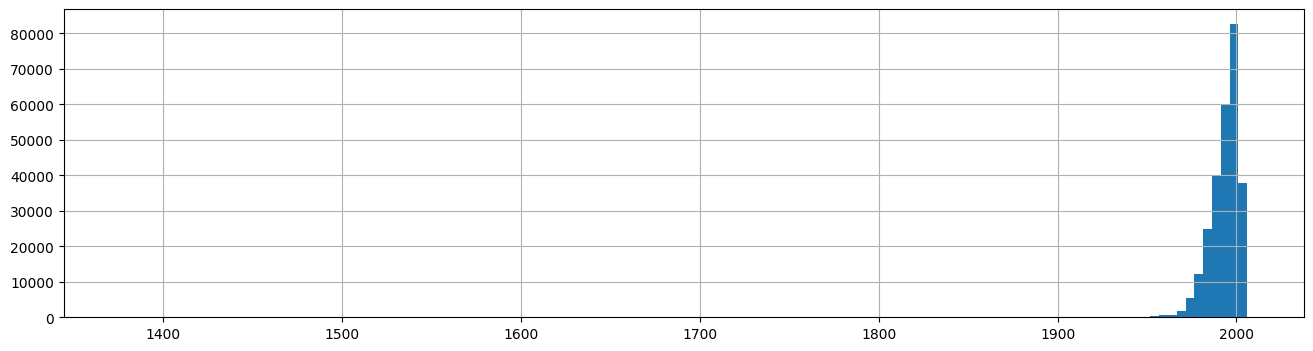

In [108]:
df_books['Year-Of-Publication'].hist(bins=128, figsize=(16,4))
plt.show()

In [109]:
df_books['Year-Of-Publication'].fillna(round(df_books['Year-Of-Publication'].median()), inplace=True)

Data tahun yang invalid akan diganti dengan median.

In [110]:
df_books['Year-Of-Publication'] = df_books['Year-Of-Publication'].apply(int)
df_books['Year-Of-Publication'] = df_books['Year-Of-Publication'].apply(str)

In [111]:
df_books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
dtype: int64

In [112]:
df_books.shape

(271360, 5)

In [113]:
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [114]:
ratings['Book-Rating'].value_counts()

Book-Rating
0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: count, dtype: int64

In [115]:
#copy dataset
df_ratings = ratings.copy()

df_ratings.drop(df_ratings.loc[df_ratings['Book-Rating']==0].index, inplace=True)

In [116]:
df_ratings.shape

(433671, 3)

In [117]:
df_ratings['Book-Rating'].unique()

array([ 5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [118]:
#copy dataset
df_users = users.copy()

df_users.drop(columns=['Location', 'Age'], inplace=True)

df_users.sample()

,User-ID
124584,124585


## Data Preparation

### Preparation for Content Based Fitering

In [119]:
df_merged = pd.merge(df_ratings, df_books, on='ISBN')
df_merged = pd.merge(df_merged, df_users, on='User-ID')

df_merged.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday
4,11676,038550120X,10,A Painted House,JOHN GRISHAM,2001,Doubleday


In [120]:
df_merged['Book-Features'] = df_merged['Book-Title'] + ', ' + df_merged['Book-Author'] + ', ' + df_merged['Publisher']

df_merged.sample()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Book-Features
349820,223341,0743236874,7,Producer: A Memoir,David L. Wolper,2003,Scribner,"Producer: A Memoir, David L. Wolper, Scribner"


In [121]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383842 entries, 0 to 383841
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   User-ID              383842 non-null  int64 
 1   ISBN                 383842 non-null  object
 2   Book-Rating          383842 non-null  int64 
 3   Book-Title           383842 non-null  object
 4   Book-Author          383840 non-null  object
 5   Year-Of-Publication  383842 non-null  object
 6   Publisher            383840 non-null  object
 7   Book-Features        383838 non-null  object
dtypes: int64(2), object(6)
memory usage: 23.4+ MB


In [122]:
content_df = df_merged.copy()

content_df.drop(columns=['Book-Author', 'Year-Of-Publication', 'Publisher'], inplace=True)

content_df.shape

(383842, 5)

In [123]:
content_df = content_df.drop_duplicates('ISBN')

content_df.sort_values('ISBN')

,User-ID,ISBN,Book-Rating,Book-Title,Book-Features
60086,171118,0000913154,8,The Way Things Work: An Illustrated Encycloped...,The Way Things Work: An Illustrated Encycloped...
94200,23902,0001046438,9,Liar,"Liar, Stephen Fry, Harpercollins Uk"
94201,23902,000104687X,6,"T.S. Eliot Reading \The Wasteland\"" and Other ...","T.S. Eliot Reading \The Wasteland\"" and Other ..."
94202,23902,0001047213,9,The Fighting Man,"The Fighting Man, Gerald Seymour, HarperCollin..."
94161,23902,0001047973,9,Brave New World,"Brave New World, Aldous Huxley, Trafalgar Squa..."
...,...,...,...,...,...
235440,222207,B0001FZGPI,7,The Bonesetter's Daughter,"The Bonesetter's Daughter, Amy Tan, Putnam Pub..."
199601,192093,B0001FZGRQ,9,The Clan of the Cave Bear,"The Clan of the Cave Bear, Jean M. Auel, Crown..."
40257,24194,B0001GMSV2,8,Find Me,"Find Me, Rosie O'Donnell, Warner Books"
172883,148258,B0001I1KOG,10,New York Public Library Literature Companion,"New York Public Library Literature Companion, ..."


In [124]:
content_df.isna().sum()

User-ID          0
ISBN             0
Book-Rating      0
Book-Title       0
Book-Features    4
dtype: int64

In [125]:
content_df.loc[content_df['Book-Features'].isna()]

,User-ID,ISBN,Book-Rating,Book-Title,Book-Features
41993,63714,0751352497,10,A+ Quiz Masters:01 Earth,NaN
82262,98391,193169656X,9,Tyrant Moon,NaN
82271,98391,1931696993,9,Finders Keepers,NaN
261953,98647,9627982032,8,The Credit Suisse Guide to Managing Your Perso...,NaN


In [126]:
content_df.dropna(inplace=True)

content_df.isna().sum()

User-ID          0
ISBN             0
Book-Rating      0
Book-Title       0
Book-Features    0
dtype: int64

In [127]:
content_df.nunique()

User-ID           26958
ISBN             149832
Book-Rating          10
Book-Title       135564
Book-Features    147323
dtype: int64

In [128]:
content_df['Book-Features'] = content_df['Book-Features'].apply(lambda x : str(x).lower())
content_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Features
0,276726,0155061224,5,Rites of Passage,"rites of passage, judith rae, heinle"
1,276729,052165615X,3,Help!: Level 1,"help!: level 1, philip prowse, cambridge unive..."
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,the amsterdam connection : level 4 (cambridge ...
3,276744,038550120X,7,A Painted House,"a painted house, john grisham, doubleday"
5,11676,0671537458,8,Waiting to Exhale,"waiting to exhale, terry mcmillan, pocket"


In [129]:
book_id = content_df['ISBN'].tolist()

book_title = content_df['Book-Title'].tolist()

book_features = content_df['Book-Features'].tolist()

print(len(book_id))
print(len(book_title))
print(len(book_features))

149832
149832
149832


In [130]:
books_dict = pd.DataFrame({
    'id': book_id,
    'book_title': book_title,
    'features': book_features
})
books_dict

,id,book_title,features
0,0155061224,Rites of Passage,"rites of passage, judith rae, heinle"
1,052165615X,Help!: Level 1,"help!: level 1, philip prowse, cambridge unive..."
2,0521795028,The Amsterdam Connection : Level 4 (Cambridge ...,the amsterdam connection : level 4 (cambridge ...
3,038550120X,A Painted House,"a painted house, john grisham, doubleday"
4,0671537458,Waiting to Exhale,"waiting to exhale, terry mcmillan, pocket"
...,...,...,...
149827,0583307841,ROBOT RACE (MICRO ADV 6),"robot race (micro adv 6), david antony kroft, ..."
149828,0004703723,Dictionary Of Economics-2Nd Ed,"dictionary of economics-2nd ed, christopher pa..."
149829,0140136908,History of Economic Thought (Penguin Economics),history of economic thought (penguin economics...
149830,0631189629,British Social Policy Since 1945 (Making Conte...,british social policy since 1945 (making conte...


### Preparation for Collaborative Filtering

In [131]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df_ratings['User-ID'].unique().tolist()

# Melakukan encoding User-ID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}

# Melakukan proses encoding angka ke User-ID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

In [132]:
# Mengubah ISBN menjadi list tanpa nilai yang sama
book_ids = df_ratings['ISBN'].unique().tolist()

# Melakukan proses encoding ISBN
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}

# Melakukan proses encoding angka ke ISBN
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}

In [133]:
new_ratings = df_ratings.copy()

# Mapping userID ke dataframe user
new_ratings['user'] = new_ratings['User-ID'].map(user_to_user_encoded)

# Mapping ISBN ke dataframe book
new_ratings['books'] = new_ratings['ISBN'].map(book_to_book_encoded)

In [134]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah buku
num_books = len(book_encoded_to_book)
print(num_books)

# Mengubah rating menjadi nilai float
new_ratings['Book-Rating'] = new_ratings['Book-Rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(new_ratings['Book-Rating'])

# Nilai maksimal rating
max_rating = max(new_ratings['Book-Rating'])

print('Number of User: {}, Number of Books: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_books, min_rating, max_rating
))

77805
185973
Number of User: 77805, Number of Books: 185973, Min Rating: 1.0, Max Rating: 10.0


In [135]:
# Mengacak dataset
new_ratings = new_ratings.sample(frac=1, random_state=42)
new_ratings

,User-ID,ISBN,Book-Rating,user,books
144846,32440,0380018179,8.0,9713,1013
211411,49144,8422641127,5.0,14390,54663
647520,156424,3442453844,7.0,44370,127953
30124,7125,0060586125,8.0,2587,10359
1052982,251606,0316789844,8.0,70897,7053
...,...,...,...,...,...
658592,159834,0441132456,7.0,45235,70428
958724,231613,0747542333,5.0,65186,33018
335707,79923,0440206154,8.0,22993,6822
373697,89610,8880891960,5.0,25753,84887


In [136]:
# Membuat variabel x untuk mencocokkan data user dan books menjadi satu value
x = new_ratings[['user', 'books']].values

# Membuat variabel y untuk membuat rating dari hasil
y = new_ratings['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * new_ratings.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[  9713   1013]
 [ 14390  54663]
 [ 44370 127953]
 ...
 [ 22993   6822]
 [ 25753  84887]
 [ 21414  43793]] [0.77777778 0.44444444 0.66666667 ... 0.77777778 0.44444444 0.77777778]


## Model Development

### Content Based Filtering

In [137]:
data = books_dict
data.head()

,id,book_title,features
0,0155061224,Rites of Passage,"rites of passage, judith rae, heinle"
1,052165615X,Help!: Level 1,"help!: level 1, philip prowse, cambridge unive..."
2,0521795028,The Amsterdam Connection : Level 4 (Cambridge ...,the amsterdam connection : level 4 (cambridge ...
3,038550120X,A Painted House,"a painted house, john grisham, doubleday"
4,0671537458,Waiting to Exhale,"waiting to exhale, terry mcmillan, pocket"


In [138]:
# Reduce size of the data for testing
sample_size = 1000

data_new = data.sample(n=sample_size, random_state=42)

data_new

,id,book_title,features
118918,0094660409,Mensa: The society for the highly intelligent,"mensa: the society for the highly intelligent,..."
68233,0060001860,Stuart Little 2: Stuart Little's Big Adventure,stuart little 2: stuart little's big adventure...
58987,0820317993,The New Georgia Guide,"the new georgia guide, university of georgia p..."
131122,0375501142,500 (Practically) Fat-Free One-Pot Recipes,"500 (practically) fat-free one-pot recipes, sa..."
56120,2290328685,Je vous aime,"je vous aime, collectif, j'ai lu"
...,...,...,...
5090,0761315810,Shattering Glass,"shattering glass, gail giles, roaring brook"
67886,0898867398,Nanda Devi: The Tragic Expedition,"nanda devi: the tragic expedition, john roskel..."
22256,1565922344,"JavaScript : The Definitive Guide, 2nd Edition...","javascript : the definitive guide, 2nd edition..."
10679,0553276182,Side Effects,"side effects, michael palmer, bantam books"


In [139]:
cv = CountVectorizer(max_features=sample_size, stop_words='english')
cv_matrix = cv.fit_transform(data_new['features'])
cv_matrix.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [140]:
cv_matrix.shape

(1000, 1000)

In [141]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan features
# Baris diisi dengan book_title

pd.DataFrame(
    cv_matrix.todense(),
    columns=data_new.features,
    index=data_new.book_title
).sample(10, axis=1).sample(10, axis=0)

features,"nebenan., bernhard hennen, piper","allergy relief: choosing the most current natural therapies, sylvia goldfarb, avery publishing group","the table where rich people sit, byrd baylor, atheneum","mudhouse sabbath, lauren f. winner, paraclete press (ma)","das mã?â¤dchen unter der brã?â¼cke. ( ab 12 j.)., nina rauprich, dtv","schmetterling und taucherglocke., jean-dominique bauby, zsolnay","treasure worth seeking, sandra brown, warner books","a national party no more: the conscience of a conservative democrat, zell miller, stroud &amp; hall","bilgewater, jane gardham, little brown uk ltd","the morpheus factor (stargate sg-1, book 4), ashely mcconnell, new american library"
book_title,,,,,,,,,,
Homes in the Ground (Science Emergent Readers),0,0,1,0,0,0,0,0,0,0
"Les lumiÃ?Â¨res de l'Amalou. 1, ThÃ?Â©o",0,0,0,0,0,0,0,0,0,0
Cordelia's Honor (Hugo Winners),0,0,0,0,0,0,0,0,0,0
The Lamb and the Butterfly (Blue Ribbon Book),0,0,0,0,0,0,0,0,0,0
Black Dog of Fate: A Memoir,0,0,0,0,0,0,0,0,0,0
The Ninth Man (Collier Spymasters Series),0,0,0,0,0,0,0,0,0,0
Dutch: A Comprehensive Grammar (Routledge Grammars),0,0,0,0,0,0,0,0,0,0
Roughing it (The world's best reading),0,0,0,0,0,0,0,0,0,0
The Complete Idiot's Guide to Learning Spanish on Your Own (Complete Idiot's Guides),0,0,0,0,0,0,0,0,1,0


In [142]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(cv_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.10259784, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.10259784, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [143]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa judul buku
cosine_sim_df = pd.DataFrame(cosine_sim, index=data_new['book_title'], columns=data_new['book_title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap books
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (1000, 1000)


book_title,A Long Finish: An Aurelio Zen Mystery,Skeleton Crew,Nuts,Fool's Puzzle (A Benni Harper Mystery),LaVerdad Sobre el Caso Savolta
book_title,,,,,
Murder in the Blood (Five Star First Edition Mystery Series),0.136083,0.000000,0.0,0.149071,0.000000
Four English Comedies (Penguin Plays &amp; Screenplays),0.000000,0.000000,0.0,0.000000,0.154303
So That Others May Live: Caroline Hebard and Her Search-And-Rescue Dogs,0.000000,0.272166,0.0,0.298142,0.000000
Remember the Alibi,0.000000,0.204124,0.0,0.447214,0.000000
Mr. Popper's Penguins,0.000000,0.000000,0.0,0.000000,0.000000
Scavenger Hunt,0.000000,0.000000,0.0,0.000000,0.000000
The Crimson Petal and the White,0.000000,0.000000,0.0,0.000000,0.000000
Silence Is Golden: A Connor Westphal Mystery (Connor Westphal Mystery),0.235702,0.000000,0.0,0.258199,0.000000
"Little Miss Innocent (Silhouette Desire, 1200)",0.000000,0.000000,0.0,0.000000,0.000000


In [144]:
def book_recommendations(book_title, similarity_data=cosine_sim_df, items=data_new[['book_title', 'features']], k=5):
    """
    Rekomendasi Buku berdasarkan kemiripan dataframe

    Parameter:
    ---
    book_title : tipe data string (str)
                Judul Buku (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan judul buku sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,book_title].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop book_title agar judul buku yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(book_title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [145]:
title_sample = data_new['book_title'].sample(1).iloc[0]

In [146]:
data_new[data_new.book_title.eq(title_sample)]

,id,book_title,features
70652,0752208195,"\15-1\"": the Master Challenge (A Channel Four ...","\15-1\"": the master challenge (a channel four ..."


In [147]:
book_recommendations(title_sample)

,book_title,features
0,The Alternate,"the alternate, john s. martel, signet book"
1,By Design,"by design, richard e. grant, pan macmillan"
2,Webster's New World Best Book of Aphorisms,"webster's new world best book of aphorisms, au..."
3,Early Stages (Lively Arts Series),"early stages (lively arts series), john gielgu..."
4,The Observer's Book of Rocks and Minerals,"the observer's book of rocks and minerals, ric..."


### Collaborative Filtering

In [148]:
# Reduce size of the data for testing
sample_size = 1000

new_ratings = new_ratings.sample(n=sample_size, random_state=42)

new_ratings

,User-ID,ISBN,Book-Rating,user,books
610259,147801,0224026690,6.0,42058,122699
448851,107740,1931468036,9.0,30873,101560
1008345,242037,1591823595,8.0,68128,170956
204460,46483,0452280702,8.0,13719,17138
455523,109491,0515130389,9.0,31355,1427
...,...,...,...,...,...
890028,214673,3499108518,7.0,60473,44086
208793,48353,9726115604,7.0,14207,54158
375162,90174,0886776430,7.0,25903,45360
231514,53392,052594527X,10.0,15622,5163


In [149]:
num_users = len(new_ratings['user'].unique().tolist())
num_books = len(new_ratings['books'].unique().tolist())

print(num_users)
print(num_books)

888
984


In [150]:
# Membuat variabel x untuk mencocokkan data user dan books menjadi satu value
x = new_ratings[['user', 'books']].values

# Membuat variabel y untuk membuat rating dari hasil
y = new_ratings['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * new_ratings.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 42058 122699]
 [ 30873 101560]
 [ 68128 170956]
 ...
 [ 25903  45360]
 [ 15622   5163]
 [  9416  41341]] [0.55555556 0.88888889 0.77777778 0.77777778 0.88888889 0.55555556
 0.77777778 0.77777778 0.77777778 0.66666667 0.88888889 1.
 0.44444444 0.88888889 0.66666667 0.66666667 0.66666667 0.44444444
 0.77777778 0.66666667 0.55555556 0.77777778 0.77777778 1.
 0.77777778 1.         0.77777778 0.55555556 0.44444444 1.
 0.88888889 0.77777778 0.44444444 0.77777778 0.77777778 0.88888889
 0.88888889 0.77777778 0.55555556 0.44444444 0.66666667 0.66666667
 0.55555556 0.66666667 0.66666667 0.66666667 1.         1.
 1.         0.77777778 1.         0.55555556 0.66666667 0.55555556
 0.55555556 0.77777778 0.44444444 1.         0.88888889 0.88888889
 0.22222222 1.         0.77777778 0.77777778 0.88888889 0.77777778
 1.         0.77777778 0.88888889 1.         0.44444444 0.66666667
 0.88888889 0.55555556 0.66666667 1.         0.77777778 0.88888889
 0.66666667 0.66666667 0.44444444 0.44444444 0.888888

In [151]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_books, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_books = num_books
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.books_embedding = layers.Embedding( # layer embeddings books
        num_books,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.books_bias = layers.Embedding(num_books, 1) # layer embedding books bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    books_vector = self.books_embedding(inputs[:, 1]) # memanggil layer embedding 3
    books_bias = self.books_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_books = tf.tensordot(user_vector, books_vector, 2)

    x = dot_user_books + user_bias + books_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [152]:
model = RecommenderNet(num_users, num_books, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [153]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
100/100 [==============================] - 4s 7ms/step - loss: 0.6933 - root_mean_squared_error: 0.3153 - val_loss: 0.6931 - val_root_mean_squared_error: 0.3017
Epoch 2/100
100/100 [==============================] - 0s 4ms/step - loss: 0.6929 - root_mean_squared_error: 0.3151 - val_loss: 0.6930 - val_root_mean_squared_error: 0.3017
Epoch 3/100
100/100 [==============================] - 0s 4ms/step - loss: 0.6923 - root_mean_squared_error: 0.3147 - val_loss: 0.6930 - val_root_mean_squared_error: 0.3017
Epoch 4/100
100/100 [==============================] - 0s 4ms/step - loss: 0.6921 - root_mean_squared_error: 0.3145 - val_loss: 0.6929 - val_root_mean_squared_error: 0.3017
Epoch 5/100
100/100 [==============================] - 0s 4ms/step - loss: 0.6918 - root_mean_squared_error: 0.3143 - val_loss: 0.6929 - val_root_mean_squared_error: 0.3017
Epoch 6/100
100/100 [==============================] - 0s 4ms/step - loss: 0.6911 - root_mean_squared_error: 0.3137 - val_loss: 0.6929 

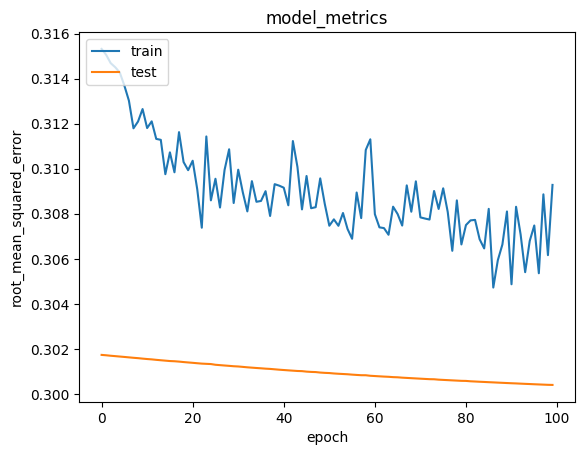

In [154]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [155]:
new_books = books_dict.copy()
df = new_ratings.copy()

# Mengambil sample user
user_id = df['User-ID'].sample(1).iloc[0]
book_rated_by_user = df[df['User-ID'] == user_id]

books_not_read = new_books[~new_books['id'].isin(book_rated_by_user['ISBN'].values)]['id']
books_not_read = list(
    set(books_not_read)
    .intersection(set(book_to_book_encoded.keys()))
)

books_not_read = [[book_to_book_encoded.get(x)] for x in books_not_read]
user_encoder = user_to_user_encoded.get(user_id)
user_books_array = np.hstack(
    ([[user_encoder]] * len(books_not_read), books_not_read)
)

In [156]:
ratings = model.predict(user_books_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_books_ids = [
    book_encoded_to_book.get(books_not_read[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Books with high ratings from user')
print('----' * 8)

top_books_user = (
    book_rated_by_user.sort_values(
        by = 'Book-Rating',
        ascending=False
    )
    .head(5)
    ['ISBN'].values
)

books_df_rows = new_books[new_books['id'].isin(top_books_user)]
for row in books_df_rows.itertuples():
    print(row.book_title, '[', row.features, ']')

print('----' * 8)
print('Top 10 books recommendation')
print('----' * 8)

recommended_books = new_books[new_books['id'].isin(recommended_books_ids)]
for row in recommended_books.itertuples():
    print(row.book_title, '[', row.features, ']')

4683/4683 [==============================] - 10s 2ms/step
Showing recommendations for users: 32034
Books with high ratings from user
--------------------------------
Crazy in Alabama [ crazy in alabama, mark childress, ballantine books ]
--------------------------------
Top 10 books recommendation
--------------------------------
The Da Vinci Code [ the da vinci code, dan brown, doubleday ]
All Around the Town [ all around the town, mary higgins clark, pocket star ]
Violets Are Blue [ violets are blue, james patterson, warner vision ]
Life of Pi [ life of pi, yann martel, harvest books ]
C Is for Corpse (Kinsey Millhone Mysteries (Paperback)) [ c is for corpse (kinsey millhone mysteries (paperback)), sue grafton, bantam ]
Fahrenheit 451 [ fahrenheit 451, ray bradbury, del rey ]
Harry Potter and the Order of the Phoenix (Book 5) [ harry potter and the order of the phoenix (book 5), j. k. rowling, scholastic ]
Last Chapter and Worse [ last chapter and worse, gary larson, andrews mcmeel p

Model berhasil memberikan top-N rekomendasi buku kepada pengguna berdasarkan data historisnya.